In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/GirlsScriptOpenSource/ml|RepoProjects/Mann-Whitney U Test/mann_whitney_sample_data.csv')

In [35]:

# Display the first few rows of the dataset to understand its structure
print(df.head())

  Group      Value
0     A  54.967142
1     A  48.617357
2     A  56.476885
3     A  65.230299
4     A  47.658466


In [36]:

# Display unique group labels
print("Unique group labels in the dataset:", df['Group'].unique())


Unique group labels in the dataset: ['A' 'B']


In [37]:

# Specify the group labels based on the dataset
group1_label = 'A'  # Actual group label
group2_label = 'B'  # Actual group label



In [38]:
# Split the data into two groups
group1 = df[df['Group'] == group1_label]['Value']
group2 = df[df['Group'] == group2_label]['Value']

In [39]:
# Check the sizes of the groups
print(f"Size of {group1_label}: {len(group1)}")
print(f"Size of {group2_label}: {len(group2)}")

Size of A: 100
Size of B: 100


In [40]:

# Ensure that the groups are not empty
if len(group1) == 0 or len(group2) == 0:
    print(f"Error: One or both groups are empty. Check the group labels: {group1_label}, {group2_label}")
else:
    # Perform the Mann-Whitney U test
    stat, p = mannwhitneyu(group1, group2)

    print(f"Mann-Whitney U Statistic: {stat}")
    print(f"P-Value: {p}")

    # Interpret the result
    alpha = 0.05
    if p < alpha:
        print("There is a significant difference between the two groups.")
    else:
        print("There is no significant difference between the two groups.")

Mann-Whitney U Statistic: 3300.0
P-Value: 3.288061008165521e-05
There is a significant difference between the two groups.


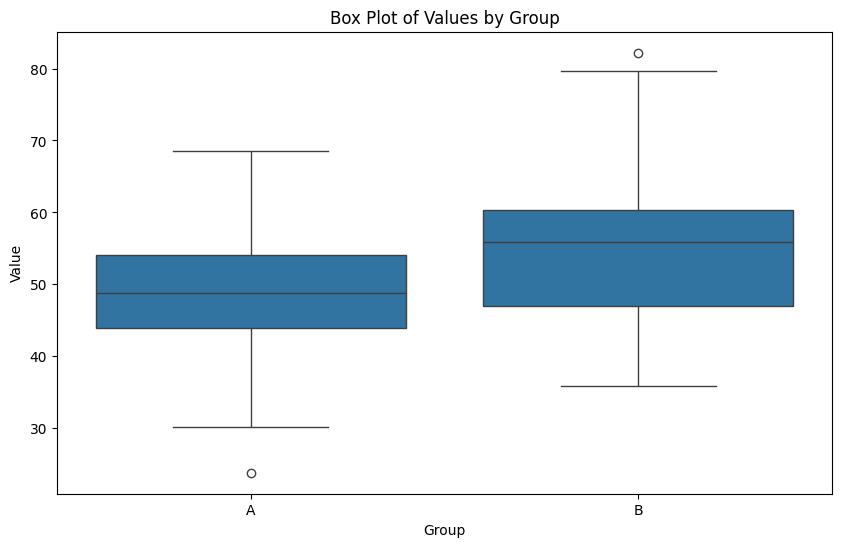

In [42]:
# Visualization
# Box Plot
plt.figure(figsize=(10, 6)) # Remove the extra space before this line
sns.boxplot(x='Group', y='Value', data=df)
plt.title('Box Plot of Values by Group')
plt.show()

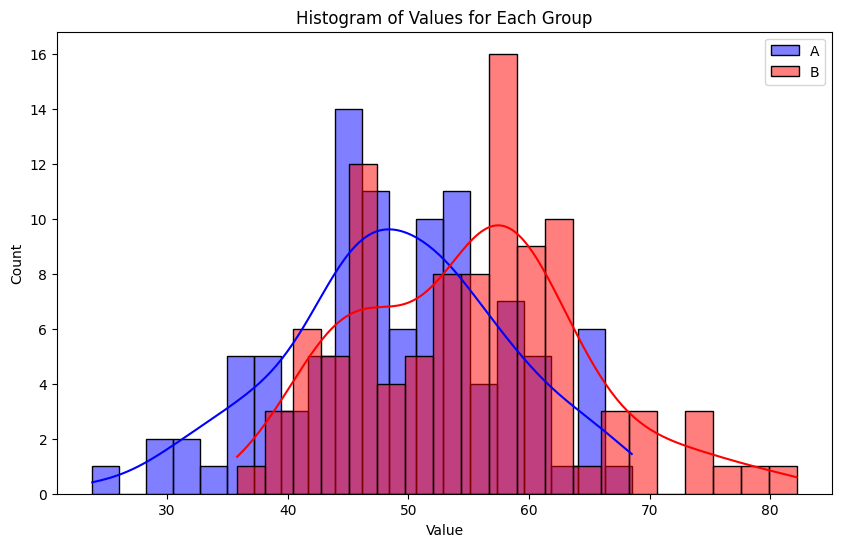

In [43]:
    # Histograms
    plt.figure(figsize=(10, 6))
    sns.histplot(group1, kde=True, color='blue', label=group1_label, bins=20)
    sns.histplot(group2, kde=True, color='red', label=group2_label, bins=20)
    plt.title('Histogram of Values for Each Group')
    plt.legend()
    plt.show()